# K-Means Clustering

*Chat GPT Prompt: You are a professor teaching a group of Masters students with limited Machine Learning knowledge. In a couple of sentences, tell them what K-Means Clustering does and where it is used*

K-Means Clustering is a machine learning algorithm that partitions a dataset into K distinct, non-overlapping subsets (clusters) based on the similarity of data points. It aims to minimize the variance within each cluster while maximizing the variance between clusters. 

*Chat GPT Prompt: We will use K-Means clustering to get an output category based on some inputs. Briefly explain this to them in a couple of sentences*

In this application of K-Means clustering, we input data points without predefined categories, and the algorithm autonomously groups them into distinct clusters based on similarity. Each cluster represents a potential output category, enabling us to identify patterns and assign input data to specific groups, facilitating categorization and analysis in an unsupervised manner.

## Choosing the value of K

To choose the value of K, we can either apply the formula:

$ k=\sqrt{n} $ where $ n $ is the number of samples,

or test the technique using different values of K, plotting the total variation for each value of K. The ultimate value for K would be at the elbow of plot, where there is not much increased variation for a new value of K.

## Loading the data set

In [94]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [95]:
# Load the datasets
train_data = pd.read_csv("data/train_data.csv")
test_data = pd.read_csv("data/test_data.csv")
validate_data = pd.read_csv("data/validate_data.csv")

In [96]:
# Add together Plant Production, Imports and Renewables production to get total output to the grid
train_data_prod = (
    train_data["Plant_Production_GWh"]
    + train_data["Imports_GWh"]
    + train_data["Renewables_Production_GWh"]
)
train_data_prod = pd.DataFrame(train_data_prod, columns=["Grid_Output"])
test_data_prod = (
    test_data["Plant_Production_GWh"]
    + test_data["Imports_GWh"]
    + test_data["Renewables_Production_GWh"]
)
test_data_prod = pd.DataFrame(test_data_prod, columns=["Grid_Output"])
validate_data_prod = (
    validate_data["Plant_Production_GWh"]
    + validate_data["Imports_GWh"]
    + validate_data["Renewables_Production_GWh"]
)
validate_data_prod = pd.DataFrame(validate_data_prod, columns=["Grid_Output"])

# print(train_data_prod)

In [97]:
# Get the month from the date column to use as an additional feature and add it to the testing and validation set
train_data["Date"] = pd.to_datetime(train_data["Date"])
train_data["Month"] = train_data["Date"].dt.month

test_data["Date"] = pd.to_datetime(test_data["Date"])
test_data["Month"] = test_data["Date"].dt.month

validate_data["Date"] = pd.to_datetime(validate_data["Date"])
validate_data["Month"] = validate_data["Date"].dt.month

In [98]:
def z_score_normalisation(train_data, test_data, val_data):
    # Calculate mean and standard deviation using the training set
    mean = train_data.mean()
    std_dev = train_data.std()

    # Apply Z-score normalisation to each set
    normalised_train_data = (train_data - mean) / std_dev
    normalised_test_data = (test_data - mean) / std_dev
    normalised_val_data = (val_data - mean) / std_dev

    return normalised_train_data, normalised_test_data, normalised_val_data

In [99]:
# Select relevant features for clustering
data_features = ["tmax", "Max_Demand_GW", "Month", "Population_k"]

# Normalise the temperature values
train_data["tmax"], test_data["tmax"], validate_data["tmax"] = z_score_normalisation(
    train_data["tmax"], test_data["tmax"], validate_data["tmax"]
)

train_features = pd.concat([train_data_prod, train_data[data_features]], axis=1)
test_features = pd.concat([test_data_prod, test_data[data_features]], axis=1)
validate_features = pd.concat(
    [validate_data_prod, validate_data[data_features]], axis=1
)

# Normalise all the data
# train_features, test_features, validate_features = z_score_normalisation(train_features, test_features, validate_features)

print(train_features)

     Grid_Output      tmax  Max_Demand_GW  Month  Population_k
0         191.50 -1.143007           0.36      1    409.379000
1         183.60 -1.283832           0.37      2    409.379000
2         178.96 -1.002181           0.34      3    409.637167
3         172.61 -0.438881           0.32      4    409.895333
4         179.50  0.054006           0.32      5    410.153500
..           ...       ...            ...    ...           ...
120       300.18 -1.143007           0.37      1    483.244083
121       236.89 -1.354244           0.41      2    484.630000
122       289.10 -0.861356           0.36      3    486.249333
123       282.57 -0.377270           0.33      4    487.868667
124       253.08  0.106816           0.34      5    489.488000

[125 rows x 5 columns]


In [100]:
# Apply K-Means clustering to training data
clustersK = 5
kmeans = KMeans(
    n_clusters=clustersK, random_state=42
)  # Adjust the number of clusters as needed
train_clusters = kmeans.fit_predict(train_features)

# Validate the clustering with silhouette score
silhouette_avg = silhouette_score(train_features, train_clusters)
print(f"Silhouette Score for Training Data: {silhouette_avg}")

Silhouette Score for Training Data: 0.5530308786078639


c:\Users\worker\.conda\envs\aml\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


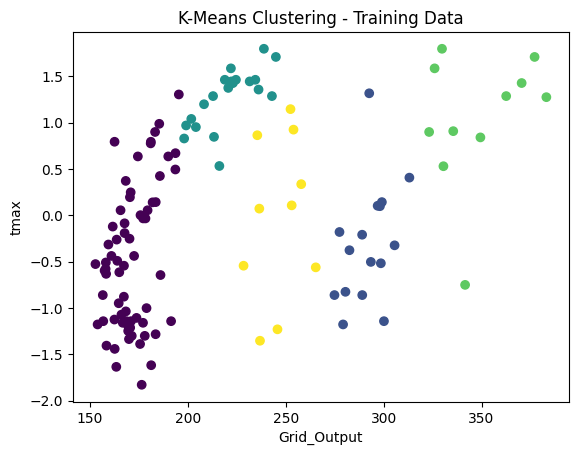

In [101]:
# Visualize the clusters in 2D
plt.scatter(
    train_features["Grid_Output"],
    train_features["tmax"],
    c=train_clusters,
    cmap="viridis",
)
plt.title("K-Means Clustering - Training Data")
plt.xlabel("Grid_Output")
plt.ylabel("tmax")
plt.show()

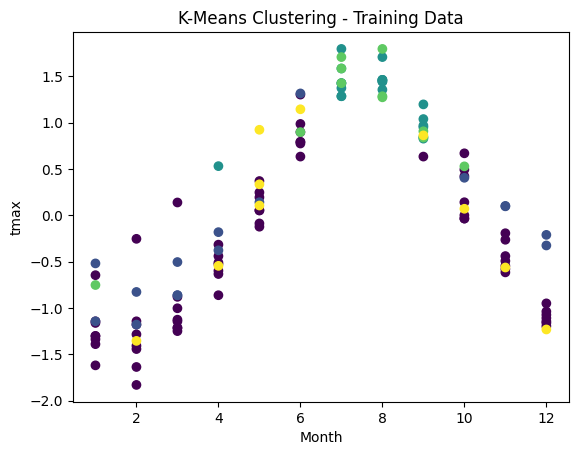

In [102]:
# Visualize the clusters in 2D
plt.scatter(
    train_features["Month"], train_features["tmax"], c=train_clusters, cmap="viridis"
)
plt.title("K-Means Clustering - Training Data")
plt.xlabel("Month")
plt.ylabel("tmax")
plt.show()

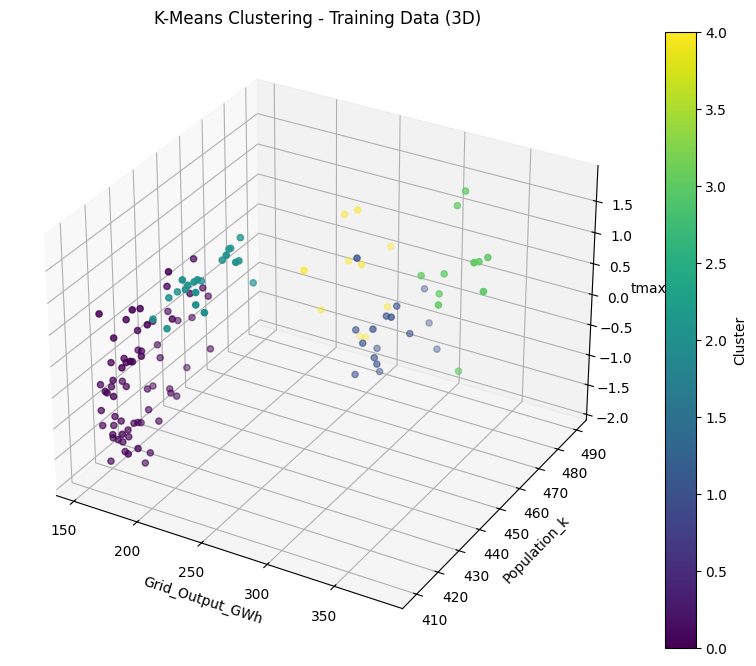

In [103]:
# Visualize the clusters in 3D (example with three features)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    train_features["Grid_Output"],
    train_features["Population_k"],
    train_features["tmax"],
    c=train_clusters,
    cmap="viridis",
)

ax.set_title("K-Means Clustering - Training Data (3D)")
ax.set_xlabel("Grid_Output_GWh")
ax.set_ylabel("Population_k")
ax.set_zlabel("tmax")

# Add colorbar
cb = plt.colorbar(scatter)
cb.set_label("Cluster")

plt.show()

In [104]:
import os

# Validate the clustering on the validation set
validate_clusters = kmeans.predict(validate_features)

# Validate the clustering on the test set
test_clusters = kmeans.predict(test_features)

# Check the unique values in validate_clusters
unique_clusters = set(validate_clusters)
print(f"Unique Clusters in Validation Data: {unique_clusters}")

# If there is only one unique cluster, you may need to adjust the number of clusters in KMeans
KMEANS_DIR = "./data/kmeans"
if not os.path.exists(KMEANS_DIR):
    os.makedirs(KMEANS_DIR)


# Save the labeled datasets
train_data.to_csv(f"{KMEANS_DIR}\labeled_train_data.csv", index=False)
test_data.to_csv(f"{KMEANS_DIR}\labeled_test_data.csv", index=False)
validate_data.to_csv(f"{KMEANS_DIR}\labeled_validate_data.csv", index=False)

# Save the cluster labels for the test and validation sets
test_data_with_clusters = pd.concat(
    [test_data, pd.DataFrame({"Cluster": test_clusters})], axis=1
)
test_data_with_clusters.to_csv(f"{KMEANS_DIR}/test_data_with_clusters.csv", index=False)

validate_data_with_clusters = pd.concat(
    [validate_data, pd.DataFrame({"Cluster": validate_clusters})], axis=1
)
validate_data_with_clusters.to_csv(f"{KMEANS_DIR}/validate_data_with_clusters.csv", index=False)

train_data_with_clusters = pd.concat(
    [train_data, pd.DataFrame({"Cluster": train_clusters})], axis=1
)
train_data_with_clusters.to_csv(f"{KMEANS_DIR}/train_data_with_clusters.csv", index=False)

Unique Clusters in Validation Data: {1, 3, 4}


In [105]:
print("Data included: ", list(train_features.columns.values))
print(f"Number of clusters K: {clustersK}")
print(f"Unique Clusters in Validation Data: {unique_clusters}")
print(f"Silhouette Score for Training Data: {silhouette_avg}")

Data included:  ['Grid_Output', 'tmax', 'Max_Demand_GW', 'Month', 'Population_k']
Number of clusters K: 5
Unique Clusters in Validation Data: {1, 3, 4}
Silhouette Score for Training Data: 0.5530308786078639


In [106]:
# Normalisation using Min Max Scaling
from sklearn.preprocessing import MinMaxScaler

## Normalize the data
scaler = MinMaxScaler()

## Fit the scaler onto the training set
scaler.fit(train_data[data_features])

## Transform the feature columns in the training, validation, and test sets
train_data_normalized = pd.DataFrame(
    scaler.transform(train_data[data_features]), columns=data_features
)
test_data_normalized = pd.DataFrame(
    scaler.transform(test_data[data_features]), columns=data_features
)
val_data_normalized = pd.DataFrame(
    scaler.transform(validate_data[data_features]), columns=data_features
)

train_features = pd.concat([train_data_prod, train_data_normalized], axis=1)
test_features = pd.concat([test_data_prod, test_data_normalized], axis=1)
validate_features = pd.concat([validate_data_prod, val_data_normalized], axis=1)

## print(train_features, test_features, validate_features)
print(train_features)

     Grid_Output      tmax  Max_Demand_GW     Month  Population_k
0         191.50  0.189320       0.409091  0.000000      0.000000
1         183.60  0.150485       0.454545  0.090909      0.000000
2         178.96  0.228155       0.318182  0.181818      0.003223
3         172.61  0.383495       0.227273  0.272727      0.006445
4         179.50  0.519417       0.227273  0.363636      0.009668
..           ...       ...            ...       ...           ...
120       300.18  0.189320       0.454545  0.000000      0.922057
121       236.89  0.131068       0.636364  0.090909      0.939358
122       289.10  0.266990       0.409091  0.181818      0.959572
123       282.57  0.400485       0.272727  0.272727      0.979786
124       253.08  0.533981       0.318182  0.363636      1.000000

[125 rows x 5 columns]
